In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn import metrics
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
policy = pd.read_csv("policy.csv")
df = pd.read_csv('policy.csv')

In [3]:
policy.head()

,PolicyId,EnrollDate,CancelDate,MonthlyPremium
0,92597,2010-12-07,NaN,34.54
1,92808,2010-11-09,NaN,18.54
2,93090,2010-11-11,NaN,23.53
3,93122,2010-11-11,NaN,44.02
4,93133,2010-11-11,NaN,32.46


In [ ]:
policy.info()

In [4]:
policy['EnrollDate'] = pd.to_datetime(policy['EnrollDate'])

In [5]:
policy['CancelDate'] = pd.to_datetime(policy['CancelDate'])

In [6]:
policy.head()

,PolicyId,EnrollDate,CancelDate,MonthlyPremium
0,92597,2010-12-07,NaT,34.54
1,92808,2010-11-09,NaT,18.54
2,93090,2010-11-11,NaT,23.53
3,93122,2010-11-11,NaT,44.02
4,93133,2010-11-11,NaT,32.46


In [7]:
policy['EnrollWeekday'] = policy['EnrollDate'].dt.dayofweek

In [8]:
policy['EnrollYear'] = policy['EnrollDate'].dt.year

In [9]:
policy.head()

,PolicyId,EnrollDate,CancelDate,MonthlyPremium,EnrollWeekday,EnrollYear
0,92597,2010-12-07,NaT,34.54,1,2010
1,92808,2010-11-09,NaT,18.54,1,2010
2,93090,2010-11-11,NaT,23.53,3,2010
3,93122,2010-11-11,NaT,44.02,3,2010
4,93133,2010-11-11,NaT,32.46,3,2010


In [10]:
policy['EnrollMonth'] = policy['EnrollDate'].dt.month

In [11]:
policy['EnrollDay'] = policy['EnrollDate'].dt.day

In [12]:
policy.head()

,PolicyId,EnrollDate,CancelDate,MonthlyPremium,EnrollWeekday,EnrollYear,EnrollMonth,EnrollDay
0,92597,2010-12-07,NaT,34.54,1,2010,12,7
1,92808,2010-11-09,NaT,18.54,1,2010,11,9
2,93090,2010-11-11,NaT,23.53,3,2010,11,11
3,93122,2010-11-11,NaT,44.02,3,2010,11,11
4,93133,2010-11-11,NaT,32.46,3,2010,11,11


In [13]:
policy['CancelDate'] = pd.to_datetime(policy['CancelDate'])

In [14]:
policy['DaysToChurn'] = policy['CancelDate'] - policy['EnrollDate']

In [15]:
policy.head()

,PolicyId,EnrollDate,CancelDate,MonthlyPremium,EnrollWeekday,EnrollYear,EnrollMonth,EnrollDay,DaysToChurn
0,92597,2010-12-07,NaT,34.54,1,2010,12,7,NaT
1,92808,2010-11-09,NaT,18.54,1,2010,11,9,NaT
2,93090,2010-11-11,NaT,23.53,3,2010,11,11,NaT
3,93122,2010-11-11,NaT,44.02,3,2010,11,11,NaT
4,93133,2010-11-11,NaT,32.46,3,2010,11,11,NaT


In [16]:
policy['CancelWeekday'] = policy['CancelDate'].dt.dayofweek

In [17]:
policy['CancelDay'] = policy['CancelDate'].dt.day

In [18]:
policy['CancelMonth'] = policy['CancelDate'].dt.month

In [19]:
policy['CancelYear'] = policy['CancelDate'].dt.year

In [20]:
policy['DaysToChurn'] = policy['DaysToChurn'].dt.days

In [21]:
policy['CancelDate'] = policy['CancelDate'].fillna(0)

In [22]:
policy['Churn'] = np.where(policy['CancelDate'] == '1970-01-01', 0, 1)

In [ ]:
policy['MonthlyPremium'] = policy['MonthlyPremium'].fillna(policy['MonthlyPremium'].mean())

In [23]:
del policy['EnrollDate']
del policy['CancelDate']

In [29]:
del policy['CancelDay']
del policy['CancelMonth']
del policy['CancelWeekday']
del policy['DaysToChurn']
del policy['CancelYear']

In [38]:
policy['LogMonthlyPremium'] = np.log(policy['MonthlyPremium'])

In [56]:
policy['LogPolicyID'] = np.log(policy['PolicyId'])

In [90]:
policy['LogEnrollYear'] = np.log(policy['EnrollYear'])

In [97]:
policy['LogEnrollDay'] = np.log(policy['EnrollDay'])

In [98]:
policy.head()

,PolicyId,EnrollDate,CancelDate,MonthlyPremium,EnrollWeekday,EnrollYear,EnrollMonth,EnrollDay,Churn,LogMonthlyPremium,LogPolicyID,LogEnrollYear,LogEnrollDay
0,92597,2010-12-07,1970-01-01,34.54,1,2010,12,7,0,3.542118,11.436012,7.60589,1.945910
1,92808,2010-11-09,1970-01-01,18.54,1,2010,11,9,0,2.919931,11.438288,7.60589,2.197225
2,93090,2010-11-11,1970-01-01,23.53,3,2010,11,11,0,3.158276,11.441322,7.60589,2.397895
3,93122,2010-11-11,1970-01-01,44.02,3,2010,11,11,0,3.784644,11.441666,7.60589,2.397895
4,93133,2010-11-11,1970-01-01,32.46,3,2010,11,11,0,3.480009,11.441784,7.60589,2.397895


In [104]:
X = policy[[
            'EnrollWeekday',
            'EnrollYear', 
            'EnrollMonth',
            'EnrollDay',
            'LogMonthlyPremium',
            'LogPolicyID',
            'LogEnrollDay']
            ]           
y = policy['Churn']

# Logistic Regression!!

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [106]:
y_test_prob = model.predict(X_test)
y_train_prob = model.predict(X_train)

In [107]:
probs = model.predict_proba(X_test)

In [108]:
print(metrics.accuracy_score(y_test, y_test_prob))
print(metrics.roc_auc_score(y_test, probs[:,1]))

0.86792
0.56473841482


In [115]:
print metrics.recall_score(y_test, y_test_prob)

0.0


In [72]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob, pos_label=0)

In [65]:
def plot_ROC(y_train_true, y_train_prob, y_test_true, y_test_prob):
    '''
    a funciton to plot the ROC curve for train labels and test labels.
    Use the best threshold found in train set to classify items in test set.
    '''
    fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train_true, y_train_prob, pos_label =True)
    sum_sensitivity_specificity_train = tpr_train + (1-fpr_train)
    best_threshold_id_train = np.argmax(sum_sensitivity_specificity_train)
    best_threshold = thresholds_train[best_threshold_id_train]
    best_fpr_train = fpr_train[best_threshold_id_train]
    best_tpr_train = tpr_train[best_threshold_id_train]
    y_train = y_train_prob > best_threshold

    cm_train = metrics.confusion_matrix(y_train_true, y_train)
    acc_train = metrics.accuracy_score(y_train_true, y_train)
    auc_train = metrics.roc_auc_score(y_train_true, y_train)

    print 'Train Accuracy: %s ' %acc_train
    print 'Train AUC: %s ' %auc_train
    print 'Train Confusion Matrix:'
    print cm_train

    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(121)
    curve1 = ax.plot(fpr_train, tpr_train)
    curve2 = ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    dot = ax.plot(best_fpr_train, best_tpr_train, marker='o', color='black')
    ax.text(best_fpr_train, best_tpr_train, s = '(%.3f,%.3f)' %(best_fpr_train, best_tpr_train))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (Train), AUC = %.4f'%auc_train)

    fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test_true, y_test_prob, pos_label =True)

    y_test = y_test_prob > best_threshold

    cm_test = metrics.confusion_matrix(y_test_true, y_test)
    acc_test = metrics.accuracy_score(y_test_true, y_test)
    auc_test = metrics.roc_auc_score(y_test_true, y_test)

    print 'Test Accuracy: %s ' %acc_test
    print 'Test AUC: %s ' %auc_test
    print 'Test Confusion Matrix:'
    print cm_test

    tpr_score = float(cm_test[1][1])/(cm_test[1][1] + cm_test[1][0])
    fpr_score = float(cm_test[0][1])/(cm_test[0][0]+ cm_test[0][1])

    ax2 = fig.add_subplot(122)
    curve1 = ax2.plot(fpr_test, tpr_test)
    curve2 = ax2.plot([0, 1], [0, 1], color='navy', linestyle='--')
    dot = ax2.plot(fpr_score, tpr_score, marker='o', color='black')
    ax2.text(fpr_score, tpr_score, s = '(%.3f,%.3f)' %(fpr_score, tpr_score))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (Test), AUC = %.4f'%auc_test)
    plt.savefig('ROC', dpi = 500)
    plt.show()

    return best_threshold

Train Accuracy: 0.867773333333 
Train AUC: 0.5 
Train Confusion Matrix:
[[65083     0]
 [ 9917     0]]
Test Accuracy: 0.86792 
Test AUC: 0.5 
Test Confusion Matrix:
[[21698     0]
 [ 3302     0]]


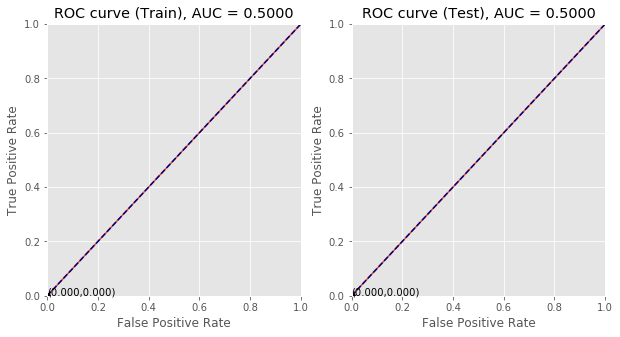

1

In [109]:
plot_ROC(y_train, y_train_prob, y_test, y_test_prob)

# Gradient Boosted Regression Trees

In [110]:
model2 = GradientBoostingClassifier()

In [111]:
model2.fit(X,y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [112]:
y_test_prob2 = model2.predict(X_test)
y_train_prob2 = model2.predict(X_train)

Train Accuracy: 0.867773333333 
Train AUC: 0.5 
Train Confusion Matrix:
[[65083     0]
 [ 9917     0]]
Test Accuracy: 0.86792 
Test AUC: 0.5 
Test Confusion Matrix:
[[21698     0]
 [ 3302     0]]


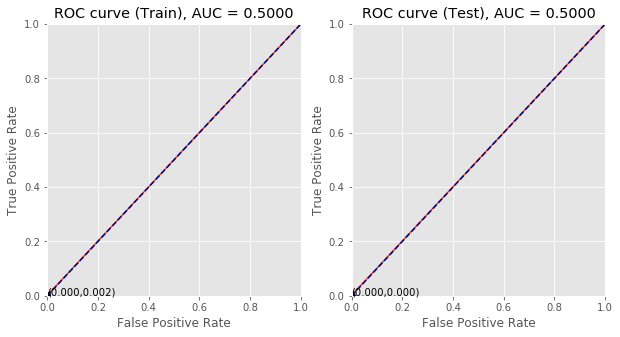

1

In [113]:
plot_ROC(y_train, y_train_prob2, y_test, y_test_prob2)

In [ ]:
policy.groupby('churn').mean()

In [112]:
policy.groupby('EnrollYear').mean()

,PolicyId,MonthlyPremium,EnrollWeekday,EnrollMonth,EnrollDay,CancelWeekday,CancelDay,CancelMonth,CancelYear
EnrollYear,,,,,,,,,
2000,37833.333333,31.993333,2.000000,12.000000,15.333333,NaN,NaN,NaN,NaN
2001,43743.546512,32.580930,2.453488,7.941860,16.662791,0.800000,19.200000,7.200000,2016.0
2002,43622.497409,32.697098,1.984456,6.450777,14.564767,3.000000,17.500000,5.333333,2016.0
2003,41873.871901,33.022149,1.793388,6.136364,15.590909,2.500000,12.900000,6.500000,2016.0
2004,36593.523179,33.158179,2.119205,7.132450,16.609272,2.944444,14.611111,7.333333,2016.0
2005,35969.430416,32.200846,2.942611,6.909613,17.021521,2.025000,16.525000,6.000000,2016.0
2006,32324.478413,34.282532,2.628938,6.970828,16.042007,2.964286,16.303571,7.303571,2016.0
2007,30884.023303,35.297082,2.606890,6.330294,15.481256,2.054545,16.327273,6.290909,2016.0
2008,24788.767270,34.938914,2.695724,6.925164,15.693257,2.629213,16.235955,6.404494,2016.0


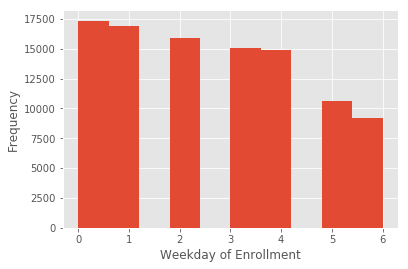

In [111]:
policy.EnrollWeekday.hist()
plt.xlabel('Weekday of Enrollment')
plt.ylabel('Frequency')

In [123]:
df['CancelDate'] = pd.to_datetime(df['CancelDate'])

In [125]:
df['CancelDate'] = df['CancelDate'].fillna(0)

In [127]:
df['Churn'] = np.where(df['CancelDate'] == '1970-01-01', 0, 1)

In [131]:
df[['CancelDate', 'Churn']]

,CancelDate,Churn
0,1970-01-01,0
1,1970-01-01,0
2,1970-01-01,0
3,1970-01-01,0
4,1970-01-01,0
5,2016-05-24,1
6,1970-01-01,0
7,1970-01-01,0
8,1970-01-01,0
9,1970-01-01,0
